# **Análise de Algoritmos de Ordenação**

In [1]:
import time
import random
import matplotlib.pyplot as plt
import sys

In [2]:
sys.setrecursionlimit(10000)

## 1. Insertion Sort

### 1.1. Busca Linear

In [3]:
def linear_insertion_sort(arr):
    items = arr.copy()
    n = len(items)
    comps = 0
    moves = 0

    for i in range(1, n):
        key = items[i]
        j = i - 1
        while j >= 0:
            comps += 1
            if items[j] > key:
                items[j + 1] = items[j]
                moves += 1
                j -= 1
            else:
                break
        
        items[j + 1] = key
        moves += 1
    return items, comps, moves

### 1.2. Busca Binária

In [4]:
def binary_search(arr, key, start, end):
    comps = 0
    while start <= end:
        mid = (start + end) // 2
        comps += 1
        if arr[mid] == key:
            return mid + 1, comps
        elif arr[mid] < key:
            start = mid + 1
        else:
            end = mid - 1
    return start, comps

def binary_insertion_sort(arr):
    items = arr.copy()
    n = len(items)
    total_comps = 0
    total_moves = 0

    for i in range(1, n):
        key = items[i]
        pos, comps = binary_search(items, key, 0, i - 1)
        total_comps += comps

        for j in range(i, pos, -1):
            items[j] = items[j - 1]
            total_moves += 1
        
        items[pos] = key
        total_moves += 1
    return items, total_comps, total_moves

## 2. Árvore Binária de Busca

### 2.1. Árvore Desbalanceada

In [5]:
class BSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.comps = 0
        self.moves = 0

    def insert(self, value):
        self.root = self._insert_recursive(self.root, value)
        self.moves += 1

    def _insert_recursive(self, current_node, value):
        if current_node is None:
            return BSTNode(value)
        
        self.comps += 1
        if value < current_node.value:
            current_node.left = self._insert_recursive(current_node.left, value)
        else:
            current_node.right = self._insert_recursive(current_node.right, value)
        return current_node
    
    def get_in_order_traversal(self):
        result = []
        self._traverse_in_order(self.root, result)
        return result

    def _traverse_in_order(self, node, result):
        if node:
            self._traverse_in_order(node.left, result)
            result.append(node.value)
            self._traverse_in_order(node.right, result)

def tree_sort(arr):
    if not arr: return [], 0, 0
    bst = BinarySearchTree()
    for value in arr:
        bst.insert(value)
    
    return bst.get_in_order_traversal(), bst.comps, bst.moves

### 2.2. Árvore Balanceada

In [6]:
class AVLNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None
        self.comps = 0
        self.moves = 0

    def _height(self, node):
        return node.height if node else 0

    def _balance_factor(self, node):
        return self._height(node.left) - self._height(node.right)

    def _rotate_right(self, y):
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        y.height = 1 + max(self._height(y.left), self._height(y.right))
        x.height = 1 + max(self._height(x.left), self._height(x.right))

        self.moves += 1
        return x

    def _rotate_left(self, x):
        y = x.right
        T2 = y.left

        y.left = x
        x.right = T2

        x.height = 1 + max(self._height(x.left), self._height(x.right))
        y.height = 1 + max(self._height(y.left), self._height(y.right))

        self.moves += 1
        return y

    def insert(self, value):
        self.root = self._insert(self.root, value)
        self.moves += 1

    def _insert(self, node, value):
        if not node:
            return AVLNode(value)

        self.comps += 1
        if value < node.value:
            node.left = self._insert(node.left, value)
        else:
            node.right = self._insert(node.right, value)

        node.height = 1 + max(self._height(node.left), self._height(node.right))
        balance = self._balance_factor(node)

        if balance > 1 and value < node.left.value:
            return self._rotate_right(node)

        if balance < -1 and value >= node.right.value:
            return self._rotate_left(node)

        if balance > 1 and value >= node.left.value:
            node.left = self._rotate_left(node.left)
            return self._rotate_right(node)

        if balance < -1 and value < node.right.value:
            node.right = self._rotate_right(node.right)
            return self._rotate_left(node)

        return node

    def get_in_order_traversal(self):
        result = []
        self._in_order(self.root, result)
        return result

    def _in_order(self, node, result):
        if node:
            self._in_order(node.left, result)
            result.append(node.value)
            self._in_order(node.right, result)

def balanced_tree_sort(arr):
    if not arr:
        return [], 0, 0

    tree = AVLTree()
    for value in arr:
        tree.insert(value)

    return tree.get_in_order_traversal(), tree.comps, tree.moves


## 3. Heapsort

### 3.1. Iterativo

In [7]:
def heapify_iterative(items, n, root_idx):
    comps = 0
    moves = 0
    current = root_idx
    while True:
        largest = current
        left = 2 * current + 1
        right = 2 * current + 2

        if left < n:
            comps += 1
            if items[left] > items[largest]:
                largest = left

        if right < n:
            comps += 1
            if items[right] > items[largest]:
                largest = right

        if largest == current:
            break

        items[current], items[largest] = items[largest], items[current]
        moves += 1
        current = largest
    return comps, moves

def heap_sort_iterative(arr):
    items = arr.copy()
    n = len(items)
    total_comps = 0
    total_moves = 0

    for i in range(n // 2 - 1, -1, -1):
        c, m = heapify_iterative(items, n, i)
        total_comps += c
        total_moves += m

    for i in range(n - 1, 0, -1):
        items[0], items[i] = items[i], items[0]
        total_moves += 1
        c, m = heapify_iterative(items, i, 0)
        total_comps += c
        total_moves += m

    return items, total_comps, total_moves

### 3.2. Recursivo

In [8]:
def heapify_recursive(items, n, root_idx):
    comps = 0
    moves = 0
    largest = root_idx
    left_child = 2 * root_idx + 1
    right_child = 2 * root_idx + 2

    if left_child < n:
        comps += 1
        if items[left_child] > items[largest]:
            largest = left_child

    if right_child < n:
        comps += 1
        if items[right_child] > items[largest]:
            largest = right_child

    if largest != root_idx:
        items[root_idx], items[largest] = items[largest], items[root_idx]
        moves += 1
        
        c, m = heapify_recursive(items, n, largest)
        comps += c
        moves += m

    return comps, moves

def heap_sort_recursive(arr):
    items = arr.copy()
    n = len(items)
    total_comps = 0
    total_moves = 0

    for i in range(n // 2 - 1, -1, -1):
        c, m = heapify_recursive(items, n, i)
        total_comps += c
        total_moves += m

    for i in range(n - 1, 0, -1):
        items[0], items[i] = items[i], items[0]
        total_moves += 1
        
        c, m = heapify_recursive(items, i, 0)
        total_comps += c
        total_moves += m

    return items, total_comps, total_moves

## 4. Benchmarks

In [9]:
def compute_metrics(arr, func):
    arr_copy = arr.copy() 
    
    start_time = time.perf_counter()
    sorted_arr, comps, moves = func(arr_copy)
    end_time = time.perf_counter()
    
    return end_time - start_time, comps, moves


def run_benchmarks(sizes, iterations):
    algorithms = {
        "Linear Insertion Sort": linear_insertion_sort,
        "Binary Insertion Sort": binary_insertion_sort,
        "Tree Sort": tree_sort,
        "Balanced Tree Sort": balanced_tree_sort,
        "Heap Sort (Iter)": heap_sort_iterative,
        "Heap Sort (Rec)": heap_sort_recursive,
    }

    final_results = {
        name: {
            case: {'tempo': [], 'comparações': [], 'movimentos': []} 
            for case in ["aleatório", "melhor", "pior"]
        } for name in algorithms
    }

    for size in sizes:
        print(f"Testando tamanho: {size}...")
        
        best_case = list(range(size))
        worst_case = list(range(size, 0, -1))
        
        temp_acc = {name: {c: {'t': 0, 'c': 0, 'm': 0} for c in ["aleatório", "melhor", "pior"]} for name in algorithms}

        for _ in range(iterations):
            random_case = [random.randint(0, size * 10) for _ in range(size)]
            cases = [("aleatório", random_case), ("melhor", best_case), ("pior", worst_case)]
            
            for case_name, data in cases:
                for alg_name, func in algorithms.items():
                    t, c, m = compute_metrics(data, func)
                    temp_acc[alg_name][case_name]['t'] += t
                    temp_acc[alg_name][case_name]['c'] += c
                    temp_acc[alg_name][case_name]['m'] += m

        for alg_name in algorithms:
            for case_name in ["aleatório", "melhor", "pior"]:
                metrics = temp_acc[alg_name][case_name]
                
                final_results[alg_name][case_name]['tempo'].append(metrics['t'] / iterations)
                final_results[alg_name][case_name]['comparações'].append(metrics['c'] / iterations)
                final_results[alg_name][case_name]['movimentos'].append(metrics['m'] / iterations)

    return final_results

test_sizes = [100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3500, 4000, 4500, 5000]
data = run_benchmarks(test_sizes, 5)

Testando tamanho: 100...
Testando tamanho: 200...
Testando tamanho: 300...
Testando tamanho: 400...
Testando tamanho: 500...
Testando tamanho: 750...
Testando tamanho: 1000...
Testando tamanho: 1250...
Testando tamanho: 1500...
Testando tamanho: 1750...
Testando tamanho: 2000...
Testando tamanho: 2250...
Testando tamanho: 2500...
Testando tamanho: 2750...
Testando tamanho: 3000...
Testando tamanho: 3500...
Testando tamanho: 4000...
Testando tamanho: 4500...
Testando tamanho: 5000...


Foram realizados testes de estresse com 19 tamanhos diferentes de arrays:

* **Intervalo:** de 100 a 5000 números.
* **Tamanhos específicos:** 100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3500, 4000, 4500 e 5000
* **Repetições:** 5 iteração por tamanho.

Para cada tamanho de entrada, foram gerados três cenários distintos (massas de teste):

1. **Caso Aleatório:** Array preenchido com inteiros aleatórios no intervalo . Representa a performance média esperada em uso real.
2. **Melhor Caso:** Array já ordenado de forma crescente ( a ). Testa a capacidade do algoritmo de identificar a ordem pré-existente.
3. **Pior Caso:** Array ordenado de forma decrescente ( até ). Força o número máximo de trocas ou desbalanceamento em estruturas de árvore.

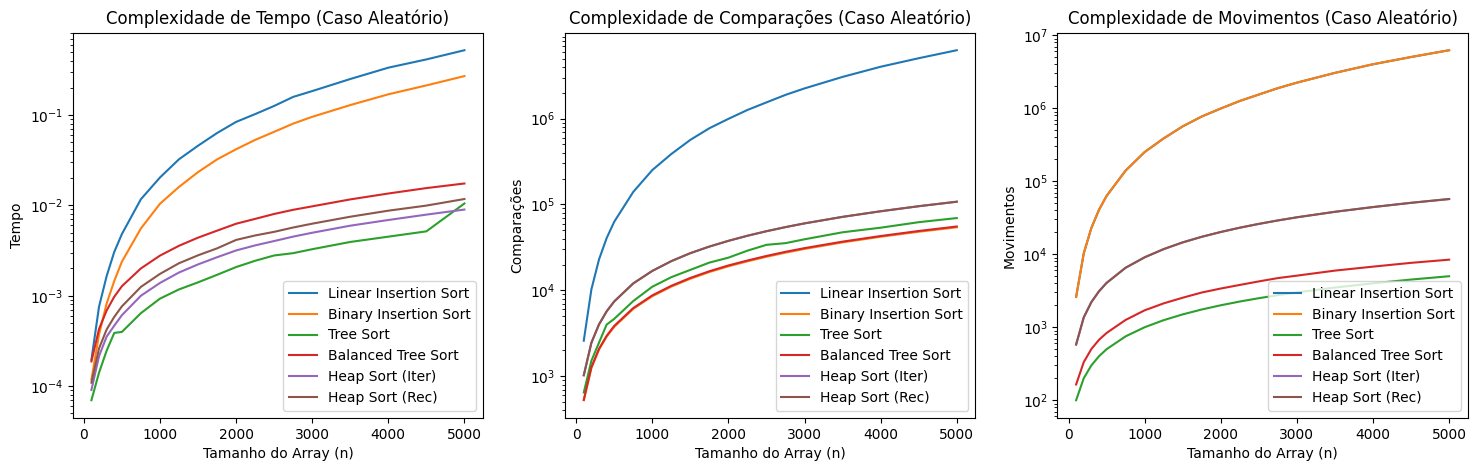

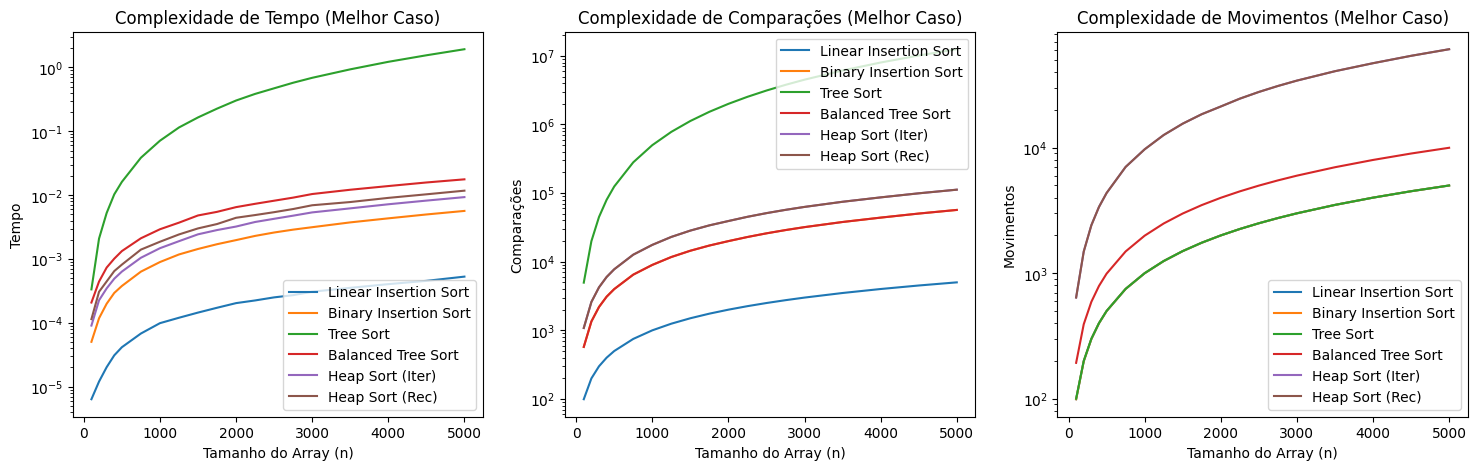

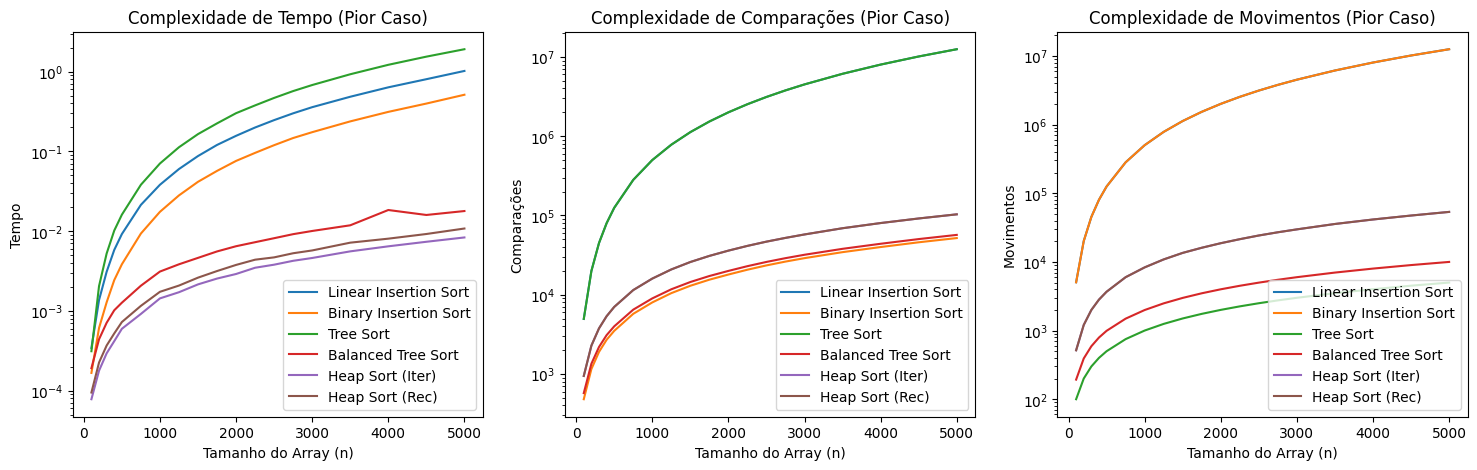

In [10]:
for case in ["aleatório", "melhor", "pior"]:
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    for name in data:
        for k, metric in enumerate(["tempo", "comparações", "movimentos"]):
            ax[k].plot(test_sizes, data[name][case][metric], label=f"{name}")
            ax[k].set_xlabel("Tamanho do Array (n)")
            ax[k].set_ylabel(f"{metric.capitalize()}")
            if case == "aleatório":
                ax[k].set_title(f"Complexidade de {metric.capitalize()} (Caso Aleatório)")
            else:
                ax[k].set_title(f"Complexidade de {metric.capitalize()} ({case.capitalize()} Caso)")
            ax[k].set_yscale("log")
            ax[k].legend()
    plt.show()

#### Análise
##### Caso Aleatório

* **Linear Insertion Sort e Binary Insertion Sort:** Apresentam crescimento quadrático $O(n^2)$ tanto em tempo quanto em movimentações. O **binary insertion sort** reduz o número de comparações para $O(n\log n)$, mas mantém o alto custo de movimentação de memória.
* **Balanced Tree Sort e Heap Sort:** Mantêm a performance , mostrando-se ordens de magnitude mais rápidos que os de inserção.

##### Melhor Caso
* **Linear Insertion Sort:** Destaca-se como o mais eficiente, com complexidade linear $O(n)$, pois realiza apenas uma comparação por elemento e nenhuma movimentação significativa.
* **Tree Sort:** Sofre degeneração. Se a árvore for inserida em ordem, ela se torna uma lista encadeada, indo para $O(n^2)$.
* **Heap Sort:** Mantém $O(n \log n)$, não sendo capaz de "aproveitar" a ordenação prévia de forma tão eficiente quanto o insertion sort.

##### Pior Caso
* **Linear Insertion Sort e Binary Insertion Sort:** Atingem seu pico de custo, com o máximo de deslocamentos possíveis.
* **Tree Sort:** Novamente degenera para $O(n^2)$ devido ao desbalanceamento da árvore.
* **Balanced Tree Sort e Heap Sort:** Mantém a complexidade $O(n \log n)$.

#### Conclusão

Para grandes volumes de dados, a escolha de algoritmos com complexidade garantida de $O(n \log n)$ (como **heap sort** e **balanced tree**) é obrigatória. O **heap sort** se mostrou ligeiramente superior em termos de movimentações puras comparado ao **Tree Sort**.

Embora o **Binary Insertion Sort** reduza drasticamente as comparações, o custo de deslocamento de elementos no array o mantém na classe de desempenho dos algoritmos quadráticos, tornando-o inviável para arrays grandes, exceto se os dados estiverem totalmente ordenados.

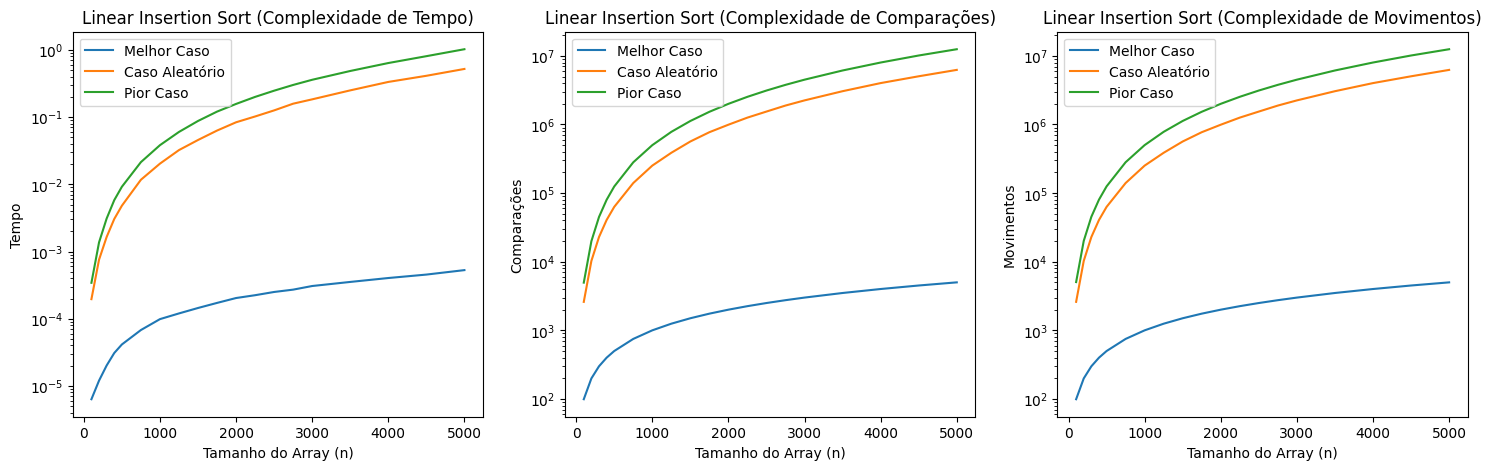

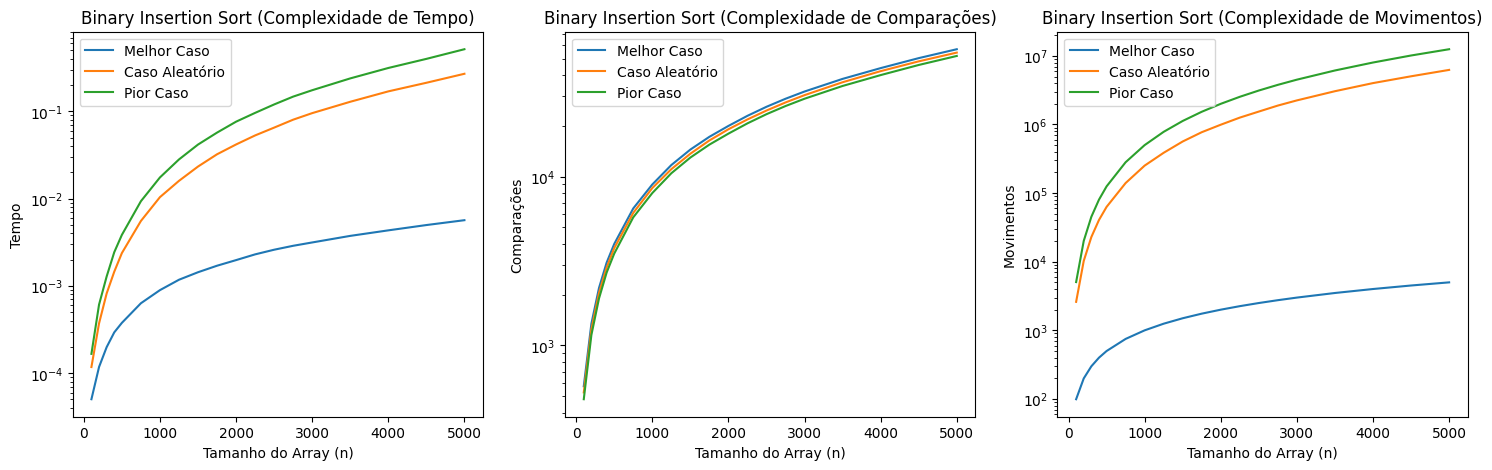

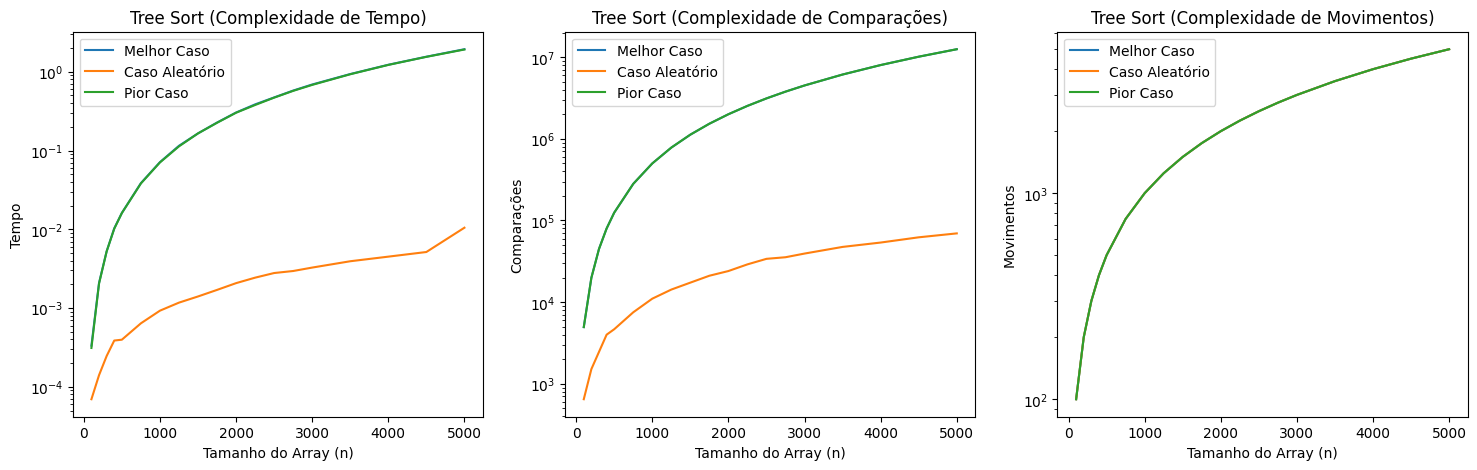

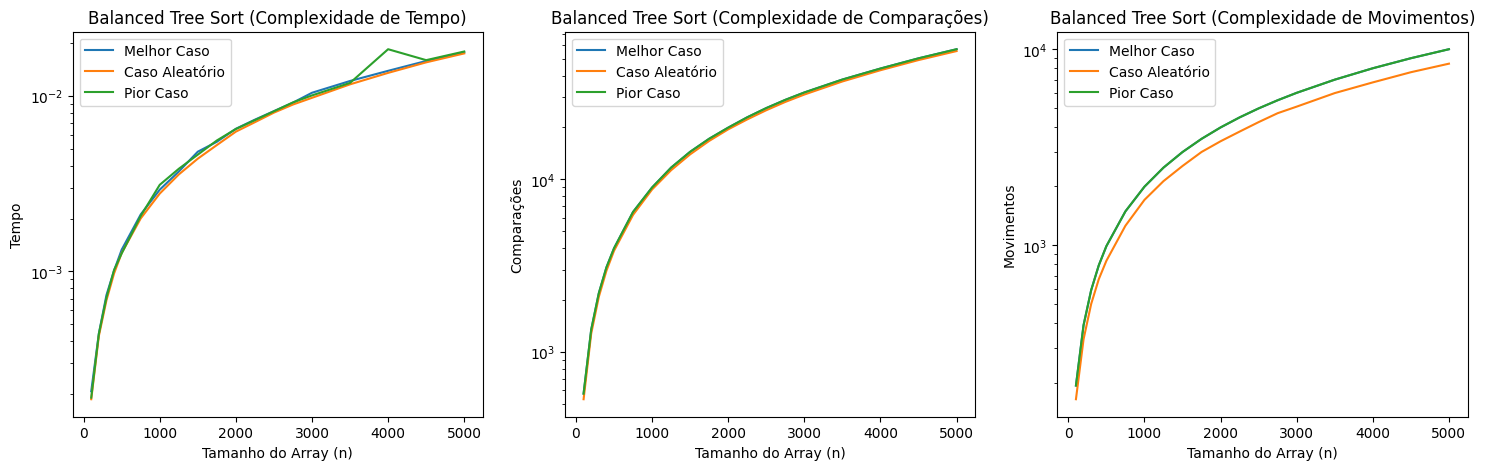

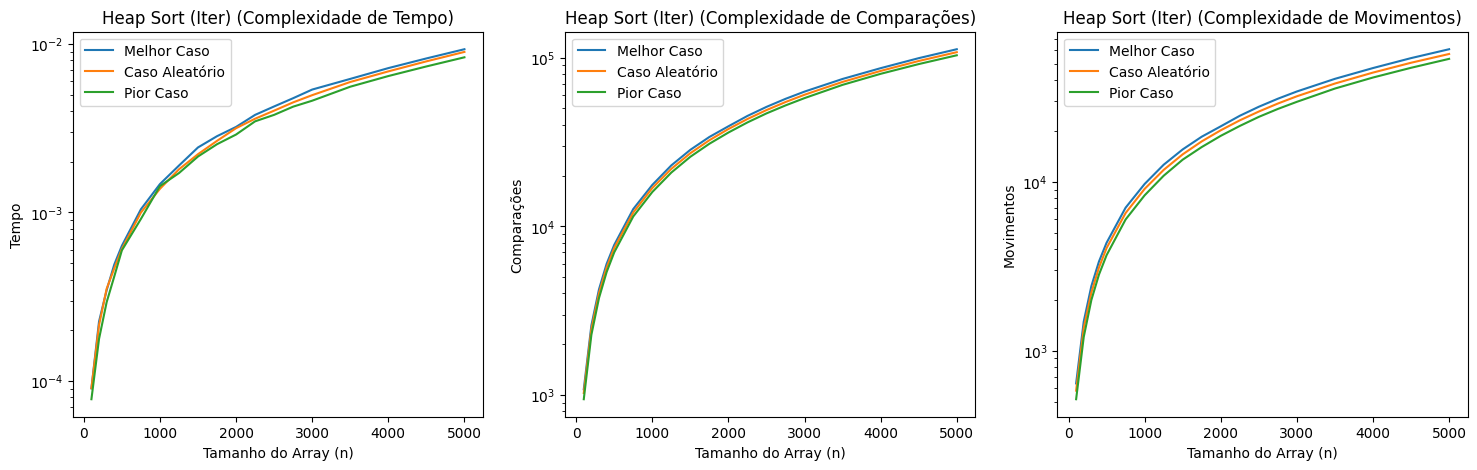

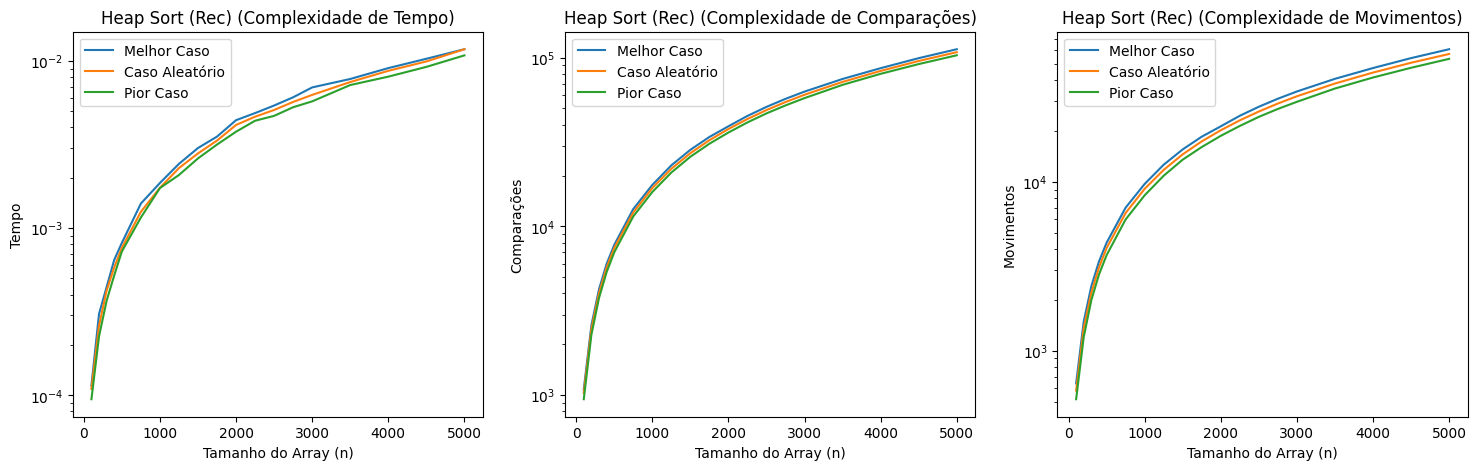

In [11]:
for name in data:
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    for i, metric in enumerate(["tempo", "comparações", "movimentos"]):
        ax[i].plot(test_sizes, data[name]["melhor"][metric], label="Melhor Caso")
        ax[i].plot(test_sizes, data[name]["aleatório"][metric], label="Caso Aleatório")
        ax[i].plot(test_sizes, data[name]["pior"][metric], label="Pior Caso")

        ax[i].set_xlabel("Tamanho do Array (n)")
        ax[i].set_ylabel(f"{metric.capitalize()}")
        ax[i].set_title(f"{name} (Complexidade de {metric.capitalize()})")
        ax[i].set_yscale("log")
        ax[i].legend()

    plt.show()

#### Análise

Enquanto a análise anterior comparava os algoritmos entre si, esta visualização permite observar como cada algoritmo reage individualmente à mudança na distribuição dos dados de entrada. O objetivo é identificar quais implementações são "estáveis" (mantêm o desempenho independente da ordem dos dados) e quais são altamente sensíveis ao cenário de teste.

* **Linear Insertion Sort:** Apresenta a maior disparidade entre as curvas. No "melhor caso", a curva é praticamente uma reta na base do gráfico (complexidade linear), enquanto no "Pior Caso", ela sobe exponencialmente no gráfico logarítmico (complexidade quadrática).

* **Binary Insertion Sort:** O gráfico de comparações mostra uma melhora significativa em relação ao linear insertion sort. No entanto, o gráfico de tempo e movimentos permanece elevado.

* **Tree Sort:** A curva do "pior caso" e do "melhor caso" tendem a se aproximar do comportamento do linear/binary insertion sort. Isso ocorre porque a árvore se torna degenerada, perdendo sua complexidade logarítmica.

* **Balanced Tree Sort:** O balanceamento garante que a árvore nunca degenere. O gráfico mostra que o custo de comparações e movimentos permanece proporcional a $n \log n$.

* **Heap Sort (Iterativo e Recursivo):** As curvas de "melhor caso", "caso aleatório" e "pior caso" aparecem quase sobrepostas. Isso demonstra a robustez do heap sort, cujo tempo de execução é garantido pela estrutura da árvore binária completa.

#### Conclusão
Algoritmos como o linear/binary insertion sort são limitados não pelo processamento de decisão (comparação), mas pelo custo de escrita na memória (movimentação). Para situações onde o tempo de resposta precisa ser previsível, o heap sort e o balanced tree sort são as melhores escolhas pois apresentam curvas quase idênticas em todos os casos de teste.